In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns 

### *EXERCISE 1*

The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test.

H_0 = "This company can't  be accused of paying substandard wages?"

H_A = "This company can  be accused of paying substandard wages?"

In [3]:
x_bar = 12.20 # sample mean
mu = 13.20 # population mean
sigma = 2.50 # population std
n = 40 # sample
alpha = 0.01 # significance level

In [4]:
z = (x_bar - mu)/(sigma/np.sqrt(n))
z

-2.5298221281347035

In [5]:
p_value = 1 - stats.norm.cdf(z)
p_value

0.9942939818069991

In [6]:
if p_value<alpha:
    print("Reject The Null Hipothesis")
else:
    print("Fail To Reject The Null Hipothesis")

Fail To Reject The Null Hipothesis


### *EXERCISE 2*

Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

H_0 = "The soils don't appear to differ with respect to average shear strength"

H_A = "The soils appear to differ with respect to average shear strength"

In [6]:
soil = pd.read_csv("soil.csv")

In [11]:
soil # we have a few missing data

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [24]:
soil.dropna(inplace=True) # we dropped missing data

In [26]:
soil.head() 

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [48]:
diff = soil.Soil1 - soil.Soil2 # we calculate soil type difference
diff.head()

0    0.078
1    0.065
2   -0.227
3    0.084
4    0.182
dtype: float64

In [49]:
d_mean = diff.mean()
d_mean

0.28416666666666673

In [50]:
d_std = diff.std()
d_std

0.29312937985356113

In [51]:
n = len(soil)
n

30

In [52]:
t_0 = d_mean/(d_std/np.sqrt(n))
t_0

5.309754126390885

In [54]:
p_value_2 = 2*(1-stats.t.cdf(t_0,n-1))
p_value_2

1.0725240883413534e-05

In [55]:
alpha_2 = 0.01
if p_value_2<alpha_2:
    print("Reject The Null Hipothesis")
else:
    print("Fail To Reject The Null Hipothesis")

Reject The Null Hipothesis


### *EXERCISE 3*

The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

1.

In [3]:
pisa = pd.read_csv("2015 PISA Test.csv")

In [4]:
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [4]:
pisa.shape

(70, 6)

In [5]:
pisa.groupby("Continent_Code").mean() # Mean

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.212100,355.457400,381.074250
AS,68.455613,466.216647,454.059682,467.945847
EU,77.274888,477.981449,476.164608,478.299381
OC,86.391704,494.559750,506.085650,511.648700
SA,60.180494,402.887700,425.359229,421.747186


In [6]:
pisa.groupby("Continent_Code").median() # Median

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.21210,355.45740,381.07425
AS,74.000000,459.81600,433.54230,456.48360
EU,76.184000,489.72870,487.25010,490.22500
OC,86.391704,494.55975,506.08565,511.64870
SA,64.289000,409.03330,425.30310,424.59050


In [10]:
pisa.groupby("Continent_Code").std() # Standart deviation 

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,7.297226,5.099513,7.916909,7.536556
AS,21.086060,64.356490,57.048962,56.671371
EU,12.425773,35.150403,37.720545,34.450616
OC,2.589686,0.938401,4.504341,2.340241
SA,9.772455,18.128894,19.709688,18.470319


In [11]:
pisa.groupby("Continent_Code").var() # Variance

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,53.249507,26.005030,62.677447,56.799679
AS,444.621918,4141.757822,3254.584049,3211.644321
EU,154.399841,1235.550805,1422.839540,1186.844969
OC,6.706475,0.880597,20.289087,5.476726
SA,95.500869,328.656783,388.471816,341.152678


In [16]:
a = pisa.groupby("Continent_Code").max()
b = pisa.groupby("Continent_Code").min()

In [20]:
a[["internet_users_per_100","Math","Reading","Science"]]-b[["internet_users_per_100","Math","Reading","Science"]] # Range

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,10.319836,7.2118,11.1962,10.6583
AS,70.908759,183.9307,188.5512,169.0893
EU,44.455021,149.9392,174.6832,150.5113
OC,3.662369,1.3271,6.3701,3.3096
SA,28.298471,45.6019,61.0295,50.2725


2.

In [6]:
AS = pisa[pisa["Continent_Code"]=="AS"]
AS[["Math"]]

,Math
1,427.4827
11,531.2961
25,403.8332
27,547.9310
30,386.1096
33,469.6695
35,380.2590
36,532.4399
37,459.8160
38,524.1062


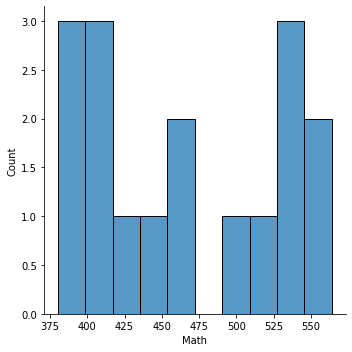

In [19]:
sns.displot(x="Math", data=AS, bins=10);

In [7]:
EU = pisa[pisa["Continent_Code"]=="EU"]
EU[["Math"]]

,Math
0,413.1570
4,496.7423
5,506.9844
6,441.1899
9,521.2506
14,437.1443
15,492.3254
16,505.9713
17,511.0876
20,485.8432


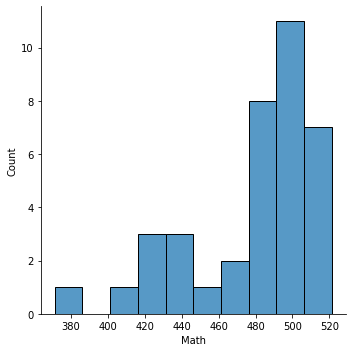

In [20]:
sns.displot(x="Math", data=EU, bins=10);

In [17]:
pisa["Math"].hist(by=pisa[pisa["Continent_Code"]=="AS"]);

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional